In [1]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [33]:
IMAGE_SIZE=256
BATCH_SIZE=32
CHANNELS=3
EPOCHS = 50

In [3]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "data",
    shuffle=True,
    image_size = (IMAGE_SIZE,IMAGE_SIZE),
    batch_size =  BATCH_SIZE
)

Found 2882 files belonging to 3 classes.


Found 2882 files belonging to 3 classes.


In [5]:
class_names = dataset.class_names
class_names



['Blight', 'Gray_Leaf_Spot', 'Healthy']

In [6]:
len(dataset)

91

In [8]:
for image_batch, label_batch in dataset.take(1):
    print(image_batch[0].shape)
    

(256, 256, 3)


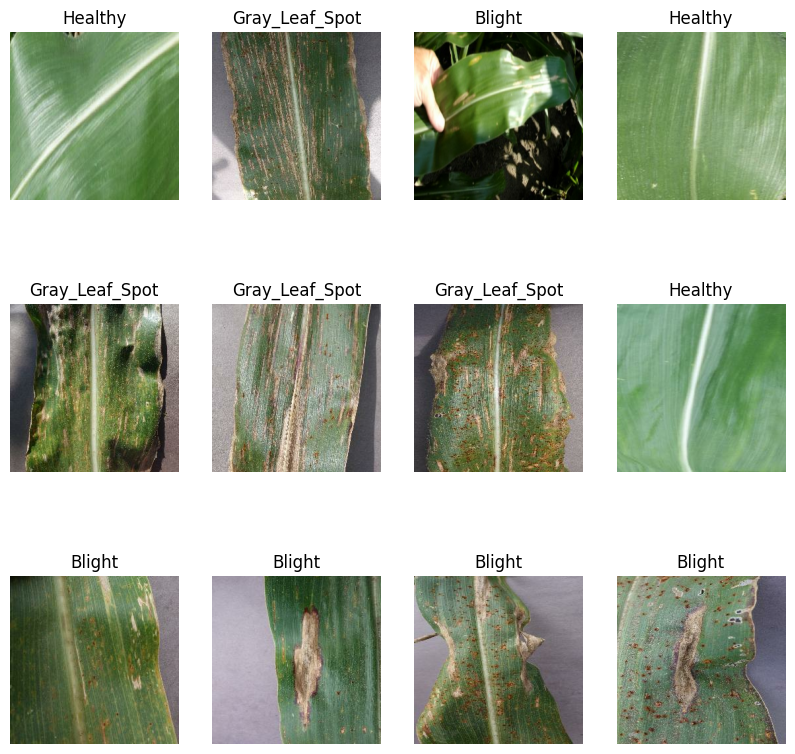

In [9]:
plt.figure(figsize=(10, 10))
for image_batch, lable_batch in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[lable_batch[i]])
        plt.axis("off")
    
    

In [10]:
len(dataset)

91

In [11]:
train_size = 0.8
len(dataset)*train_size

72.8

In [12]:
train_ds= dataset.take(72)
len(train_ds)

72

In [13]:
test_ds = dataset.skip(72)
len(test_ds)

19

In [14]:
val_size=0.1
len(dataset)*val_size

9.1

In [15]:
val_ds =test_ds.take(9)
len(val_ds)

9

In [16]:
test_ds = test_ds.skip(9)
len(test_ds)

10

In [17]:
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, shuffle=True, shuffle_size=10000):
    ds_size =len(ds)
    if shuffle:
        ds =ds.shuffle(shuffle_size, seed=12)
    train_size =int(train_split * ds_size)
    val_size = int(val_split * ds_size)
    train_ds = ds.take(train_size)
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    return train_ds, val_ds, test_ds
     

In [18]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [19]:
len(train_ds)

72

In [20]:
len(val_ds)

9

In [21]:
len(test_ds)

10

In [22]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [23]:
resize_and_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])
    

In [24]:
data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2),
])

In [28]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes=3

model = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32, (3,3), activation='relu', input_shape= input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])
model.build(input_shape=input_shape)

In [29]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential (Sequential)      (32, 256, 256, 3)         0         
_________________________________________________________________
sequential_1 (Sequential)    (32, 256, 256, 3)         0         
_________________________________________________________________
conv2d (Conv2D)              (32, 254, 254, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (32, 127, 127, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (32, 125, 125, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (32, 62, 62, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (32, 60, 60, 64)         

In [31]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [34]:
history = model.fit(
    train_ds,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    verbose=1,
    validation_data=val_ds
)

Epoch 1/50
72/72 [==============================] - 269s 3s/step - loss: 0.7952 - accuracy: 0.5981 - val_loss: 0.5692 - val_accuracy: 0.7396
Epoch 2/50
72/72 [==============================] - 236s 3s/step - loss: 0.4379 - accuracy: 0.7933 - val_loss: 0.4086 - val_accuracy: 0.8021
Epoch 3/50
72/72 [==============================] - 230s 3s/step - loss: 0.4437 - accuracy: 0.7977 - val_loss: 0.3814 - val_accuracy: 0.8021
Epoch 4/50
72/72 [==============================] - 230s 3s/step - loss: 0.3761 - accuracy: 0.8157 - val_loss: 0.3806 - val_accuracy: 0.7917
Epoch 5/50
72/72 [==============================] - 362s 5s/step - loss: 0.4042 - accuracy: 0.8100 - val_loss: 0.3731 - val_accuracy: 0.7986
Epoch 6/50
72/72 [==============================] - 237s 3s/step - loss: 0.3363 - accuracy: 0.8237 - val_loss: 0.3469 - val_accuracy: 0.8194
Epoch 7/50
72/72 [==============================] - 214s 3s/step - loss: 0.3387 - accuracy: 0.8281 - val_loss: 0.3633 - val_accuracy: 0.7778
Epoch 8/50
72

In [35]:
scores = model.evaluate(test_ds)

10/10 [==============================] - 21s 848ms/step - loss: 0.2076 - accuracy: 0.9125


In [36]:
scores

[0.2075553685426712, 0.9125000238418579]

In [37]:
history

In [38]:
history.params

{'verbose': 1, 'epochs': 50, 'steps': 72}

In [39]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [40]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

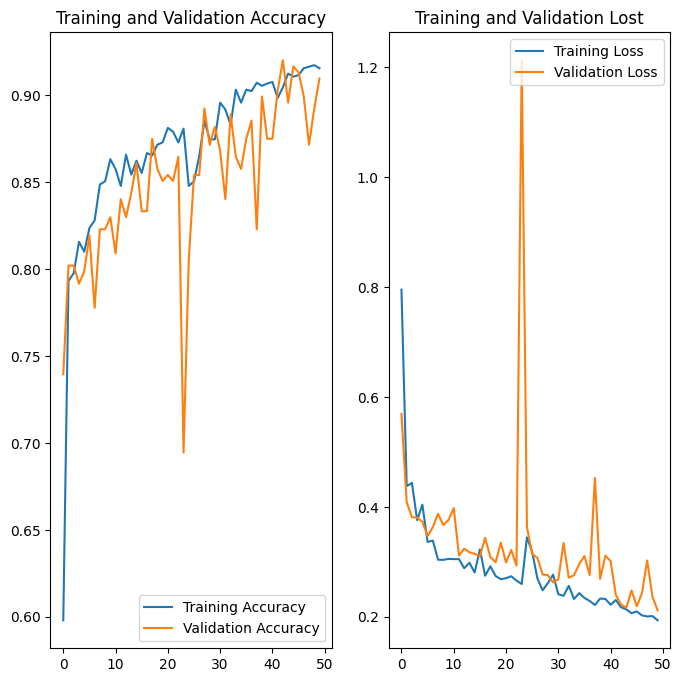

In [41]:
plt.figure(figsize=(8,8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Lost')
plt.show()

In [44]:
np.argmax([0.01806433, 0.00992786, 0.9720078 ])


2

first image to predict
actual label: Gray_Leaf_Spot
predicted lable: Gray_Leaf_Spot


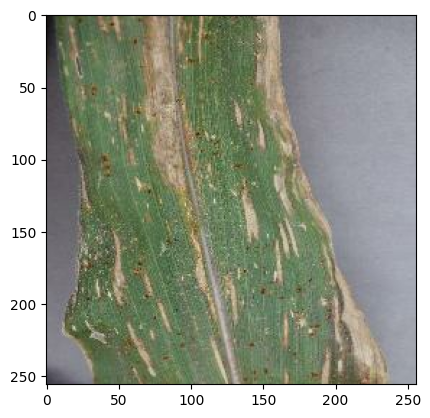

In [48]:
import numpy as np
for images_batch, labels_batch in test_ds.take(1):

    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()

    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])

    batch_prediction = model.predict(images_batch)
    print("predicted lable:",class_names[np.argmax(batch_prediction[0])])
    
    

In [49]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0) # Create a batch

    predictions = model.predict(img_array)
    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

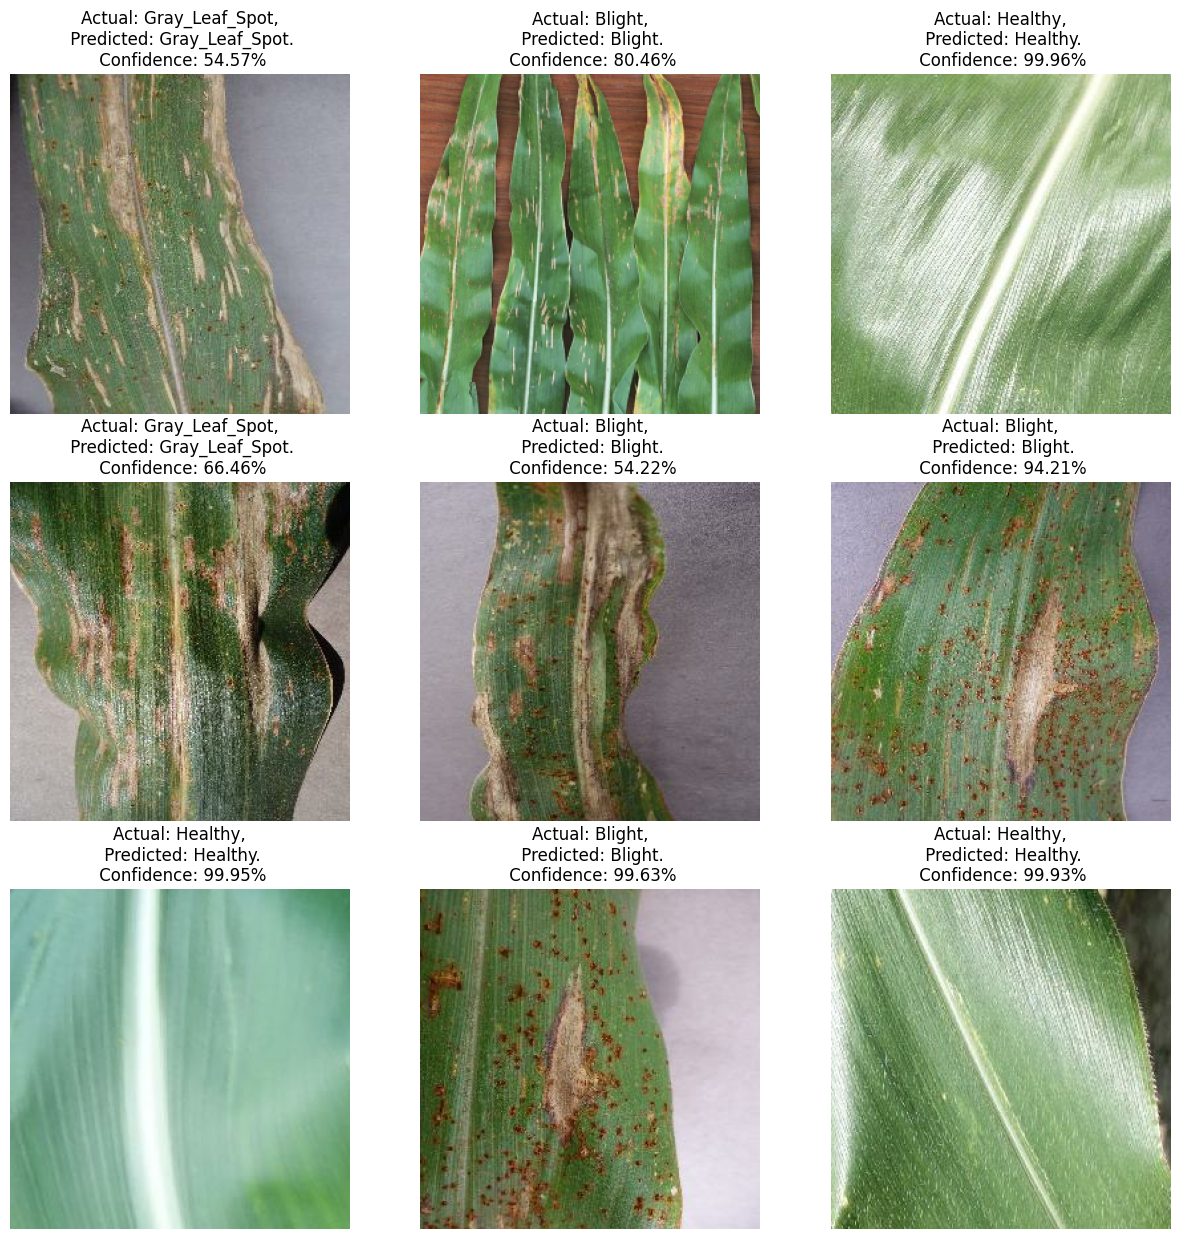

In [50]:
plt.figure(figsize=(15,15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))

        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]]

        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")

In [58]:
import os
model_version=max([int(i) for i in os.listdir("../models")+[0]])+1
model.save(f"../models/{model_version}")

INFO:tensorflow:Assets written to: ../models/4\assets
